In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
sc=StandardScaler()
mm=MinMaxScaler(feature_range=(0, 2), copy=True)

In [ ]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/train_yaOffsB%20-%20train_yaOffsB.csv")
test=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/test_pFkWwen%20-%20test_pFkWwen.csv")
sample_sub=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/sample_submission_O1oDc4H%20-%20sample_submission_O1oDc4H.csv")

In [ ]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,NaN,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2


In [ ]:
sample_sub

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
...,...,...
59305,F00155901,1
59306,F00155912,1
59307,F00155930,1
59308,F00155933,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [ ]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [ ]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [ ]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [ ]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [ ]:
# fill up missing values with median
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].median())
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].median())

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [ ]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [ ]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,28.0,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,28.0,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2


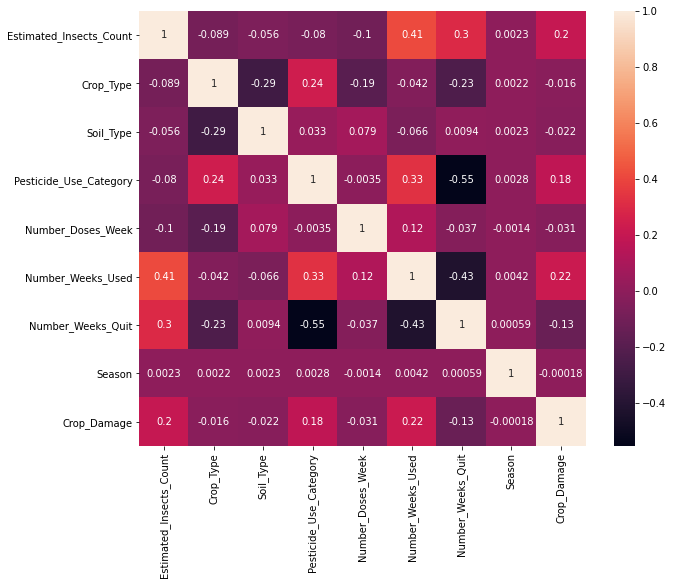

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

In [ ]:
damage = train.groupby(by=("Crop_Damage")).sum().reset_index()
damage

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,97675485,21460,34397,165520,1939040,2035257.0,750594,140847
1,1,22633880,3103,5354,29741,297535,417472.0,93911,23310
2,2,4004062,706,983,5930,60400,85124.0,7642,4403


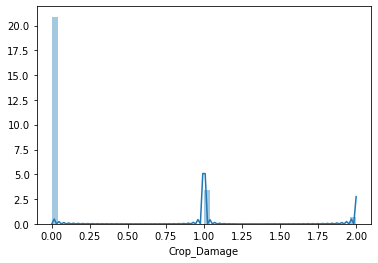

In [ ]:
sns.distplot(train['Crop_Damage'])

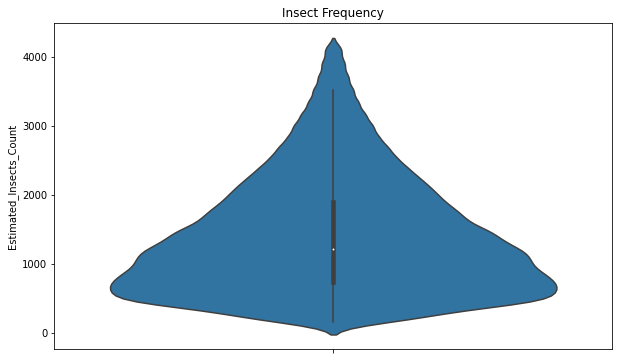

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Insect Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Estimated_Insects_Count"])
plt.show()

In [ ]:
insect = train.groupby(by=("Estimated_Insects_Count"))["Crop_Damage"].sum().reset_index()
insect

,Estimated_Insects_Count,Crop_Damage
0,150,13
1,151,2
2,168,12
3,169,2
4,188,10
...,...,...
66,3702,261
67,3895,159
68,3896,57
69,4096,111


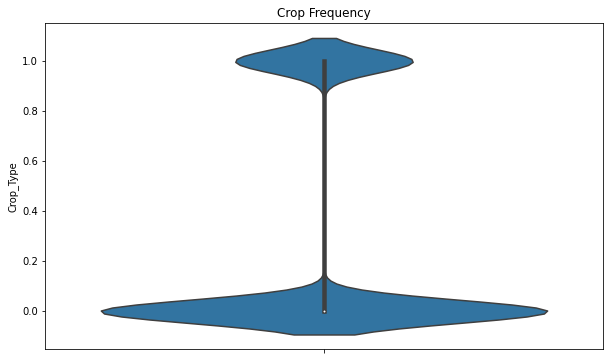

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Crop Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Crop_Type"])
plt.show()

In [ ]:
crop = train.groupby(by=("Crop_Type"))["Crop_Damage"].sum().reset_index()
crop

,Crop_Type,Crop_Damage
0,0,12418
1,1,4515


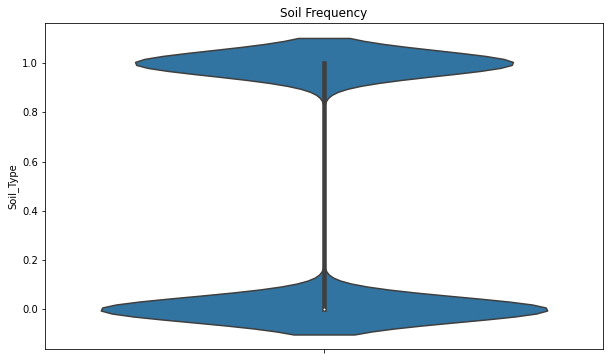

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Soil Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Soil_Type"])
plt.show()

In [ ]:
soil = train.groupby(by=("Soil_Type"))["Crop_Damage"].sum().reset_index()
soil

,Soil_Type,Crop_Damage
0,0,9613
1,1,7320


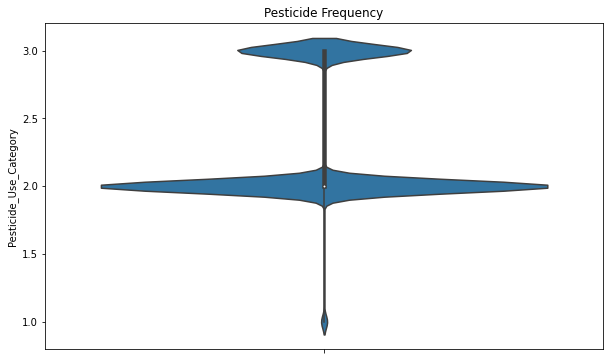

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Pesticide Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Pesticide_Use_Category"])
plt.show()

In [ ]:
pest = train.groupby(by=("Pesticide_Use_Category"))["Crop_Damage"].sum().reset_index()
pest

,Pesticide_Use_Category,Crop_Damage
0,1,884
1,2,7430
2,3,8619


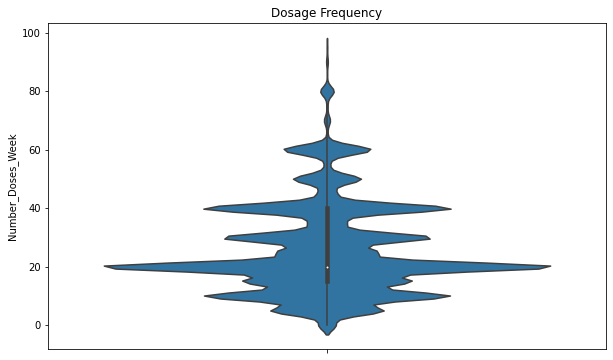

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Dosage Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Doses_Week"])
plt.show()

In [ ]:
dose = train.groupby(by=("Number_Doses_Week"))["Crop_Damage"].sum().reset_index()
dose

,Number_Doses_Week,Crop_Damage
0,0,884
1,5,553
2,10,1836
3,15,1190
4,20,5558
5,25,692
6,30,2061
7,35,215
8,40,2615
9,45,81


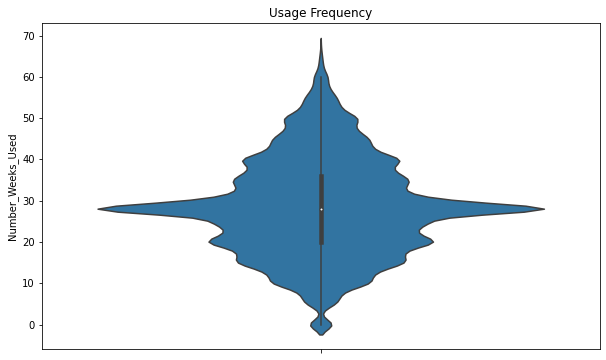

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Usage Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Used"])
plt.show()

In [ ]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

In [ ]:
week = train.groupby(by=("Number_Weeks_Used"))["Crop_Damage"].sum().reset_index()
week

,Number_Weeks_Used,Crop_Damage
0,0,771
1,5,33
2,6,15
3,7,18
4,8,32
...,...,...
59,63,21
60,64,21
61,65,23
62,66,8


In [ ]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

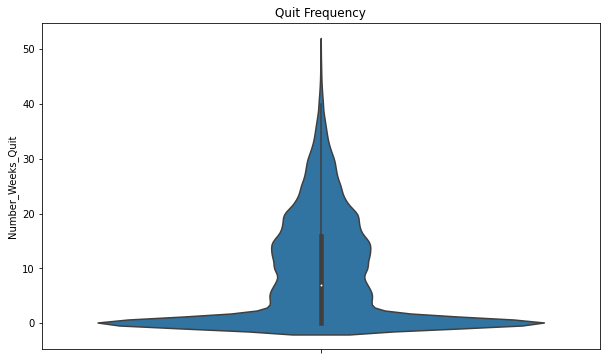

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Quit Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Quit"])
plt.show()

In [ ]:
quit = train.groupby(by=("Number_Weeks_Quit"))["Crop_Damage"].sum().reset_index()
quit

,Number_Weeks_Quit,Crop_Damage
0,0,9557
1,1,147
2,2,241
3,3,286
4,4,278
5,5,390
6,6,326
7,7,308
8,8,277
9,9,231


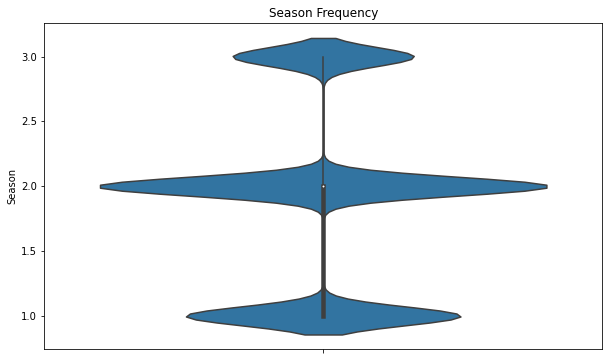

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Season Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Season"])
plt.show()

In [ ]:
season = train.groupby(by=("Season"))["Crop_Damage"].sum().reset_index()
season

,Season,Crop_Damage
0,1,5070
1,2,8543
2,3,3320


In [ ]:
#set up features
features=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week',
          'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']

train_labels = np.array(train.Crop_Damage.values.reshape(-1, 1), dtype=np.float32)

In [ ]:
#define x, y and x_test
X=train[features]
y=train_labels
X_test=test[features]

In [ ]:
#scale x, y and x_test
X=mm.fit_transform(X)
y=mm.fit_transform(y)
X_test=mm.fit_transform(X_test)

In [ ]:
#split training set for training and testing
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.15)

In [ ]:
#check shapes of testing data
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((75529, 8), (13329, 8), (75529, 1), (13329, 1))

In [ ]:
#smote
#smote=SMOTE("minority")
#X,y=smote.fit_sample(train_X,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# random forest
rfc = RandomForestClassifier(n_estimators=10).fit(train_X, train_y)
# predict on test set
rfc_pred = rfc.predict(val_X)
# scoring
accuracy_score(val_y, rfc_pred), f1_score(val_y, rfc_pred, average='weighted'), recall_score(val_y, rfc_pred, average='weighted')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(0.8142396278790607, 0.7878367622988117, 0.8142396278790607)

In [ ]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = rfc.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(val_y, rfc_pred)

array([[10454,   567,    63],
       [ 1445,   385,    70],
       [  220,   111,    14]])

In [ ]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(val_y, rfc_pred))
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column
pd.DataFrame(confmtrx, index=['Alive','Other_Causes', 'Pesticides'],
columns=['predicted_Alive', 'predicted_Other_Causes', 'predicted_Pesticides'])


,predicted_Alive,predicted_Other_Causes,predicted_Pesticides
Alive,10454,567,63
Other_Causes,1445,385,70
Pesticides,220,111,14


In [ ]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(val_y, rfc_pred))  
#Create classification report
class_report=classification_report(val_y, rfc_pred)
print(class_report)

Accuracy Score: 0.8142396278790607
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11084
         1.0       0.36      0.20      0.26      1900
         2.0       0.10      0.04      0.06       345

    accuracy                           0.81     13329
   macro avg       0.44      0.40      0.41     13329
weighted avg       0.77      0.81      0.79     13329



In [ ]:
y_pred=rfc.predict(val_X)

val_y=val_y.flatten()
y_pred=y_pred.flatten()

df=pd.DataFrame({'Actual': val_y, 'Predicted':y_pred})
df

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
13324,0.0,0.0
13325,0.0,1.0
13326,0.0,0.0
13327,0.0,0.0


In [ ]:
ynew= rfc.predict(X_test)

In [ ]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = rfc.predict(X_test)
predictions

array([1., 1., 1., ..., 1., 0., 0.], dtype=float32)

In [ ]:
submission = pd.DataFrame({
        "ID": test.ID,
        "Crop_Damage": predictions.flatten()
    })
submission.to_csv('submission.csv', index=False)
submission

,ID,Crop_Damage
0,F00000002,1.0
1,F00000007,1.0
2,F00000011,1.0
3,F00000013,2.0
4,F00000014,1.0
...,...,...
59305,F00155937,0.0
59306,F00155940,0.0
59307,F00155941,1.0
59308,F00155943,0.0
